# EDA and Feature Engineering of the Google Playstore Dataset

In [1]:
# !pip install matplotlib seaborn pandas numpy warnings

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Enable inline plotting for Jupyter notebooks
%matplotlib inline
sns.set_style("whitegrid") # Set the style for seaborn plots to whitegrid

In [3]:
df = pd.read_csv('./data/googleplaystore.csv')
df.head()
# df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Check for missing values count in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Create a copy of the original dataframe
df_copy = df.copy()

In [9]:
# Converting the 'Reviews' column to integer type
df_copy['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [10]:
# df_copy['Reviews'].astype('float')

In [11]:
df_copy['Reviews'].str.isnumeric().sum()

np.int64(10840)

[Common String Methods in Python](https://www.w3schools.com/python/python_ref_string.asp)

In [12]:
# df_copy[~(df_copy["Type"] == "Free")]

In [13]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df_copy = df_copy.drop(df_copy.index[10472])

In [15]:
# df_copy[~df_copy['Reviews'].str.isnumeric()]

In [16]:
df_copy["Reviews"] = df_copy["Reviews"].astype("int")

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [18]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
# 1 MB = 1000KB = 1,000,000 bytes
# 1 KB = 1,000 bytes
# str.replace() is used to replace substrings within a string
# But, .replace() method is used to replace values of a cell in a Series or DataFrame

df_copy["Size"] = df_copy["Size"].str.replace("M", "000")
df_copy["Size"] = df_copy["Size"].str.replace("k", "")
df_copy["Size"] = df_copy["Size"].str.replace(".", "")
df_copy["Size"] = df_copy["Size"].replace("Varies with device", np.nan)

In [20]:
df_copy["Size"].unique()

array(['19000', '14000', '87000', '25000', '28000', '56000', '29000',
       '33000', '31000', '12000', '20000', '21000', '37000', '27000',
       '55000', '17000', '39000', '42000', '70000', '23000', '60000',
       '61000', '46000', '92000', '52000', '11000', '24000', nan, '94000',
       '15000', '10000', '26000', '80000', '79000', '57000', '35000',
       '54000', '201', '36000', '86000', '16000', '34000', '89000',
       '38000', '32000', '18000', '22000', '45000', '98000', '90000',
       '67000', '30000', '71000', '74000', '64000', '82000', '99000',
       '49000', '95000', '50000', '59000', '13000', '73000', '68000',
       '40000', '72000', '91000', '23', '65000', '75000', '51000',
       '41000', '48000', '85000', '83000', '43000', '47000', '78000',
       '88000', '66000', '79', '84000', '118', '44000', '695', '62000',
       '18', '53000', '58000', '96000', '63000', '77000', '69000',
       '93000', '100000', '81000', '97000', '556', '526', '76000', '334',
       '232', '62

In [21]:
df_copy["Size"] = df_copy["Size"].astype("float")

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [23]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
df_copy["Installs"] = df_copy["Installs"].str.replace("+", "")
df_copy["Installs"] = df_copy["Installs"].str.replace(",", "")

In [25]:
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df_copy["Installs"] = df_copy["Installs"].astype("int")

In [27]:
df_copy["Installs"].info()

<class 'pandas.core.series.Series'>
Index: 10840 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10840 non-null  int64
dtypes: int64(1)
memory usage: 169.4 KB


In [28]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [29]:
df_copy["Price"] = df_copy["Price"].str.replace("$", "")

In [30]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [31]:
df_copy["Price"] = df_copy["Price"].astype("float")

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [33]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df_copy["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [35]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])
df_copy["LU_Day"] = df_copy["Last Updated"].dt.day
df_copy["LU_Month"] = df_copy["Last Updated"].dt.month
df_copy["LU_Year"] = df_copy["Last Updated"].dt.year

In [36]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LU_Day,LU_Month,LU_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  LU_Day          10840 non-null  int32         
 14  LU_Month        10840 non-null  int32         
 15  LU_Year

In [38]:
# df_copy.shape

# returns the number of rows in the dataframe
len(df_copy)

10840

In [39]:
df_copy[df_copy['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LU_Day,LU_Month,LU_Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,14000.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,40000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [40]:
df_copy[df_copy['App'] == "AAFP"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LU_Day,LU_Month,LU_Year
2515,AAFP,MEDICAL,3.8,63,24000.0,10000,Free,0.0,Everyone,Medical,2018-06-22,2.3.1,5.0 and up,22,6,2018
10768,AAFP,MEDICAL,3.8,63,24000.0,10000,Free,0.0,Everyone,Medical,2018-06-22,2.3.1,5.0 and up,22,6,2018


In [41]:
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')

In [42]:
df_copy.shape

(9659, 16)

In [43]:
# The next thing we can do is data encoding for categorical variables like 'Category', 'Content Rating', 'Genres', and 'Type'. 
# We can use techniques like one-hot encoding or label encoding based on the analysis requirements.

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  LU_Day          9659 non-null   int32         
 14  LU_Month        9659 non-null   int32         
 15  LU_Year 

In [45]:
# To handle the missing values in the 'Size' column, we can consider 
# imputing them using the mean or median size of apps within the same category.

df_copy['Size'] = df_copy['Size'].fillna(df_copy['Size'].median())
df_copy['Rating'] = df_copy['Size'].fillna(df_copy['Rating'].median())

In [46]:
# For categorical columns like 'Content Rating', 'Genres', and 'Type', 
# we can impute missing values with the mode (most frequent value) of each column.

df_copy['Type'] = df_copy['Type'].fillna(df_copy['Type'].mode()[0])
df_copy['Current Ver'] = df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode()[0])
df_copy['Android Ver'] = df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode()[0])

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9659 non-null   object        
 12  Android Ver     9659 non-null   object        
 13  LU_Day          9659 non-null   int32         
 14  LU_Month        9659 non-null   int32         
 15  LU_Year 

In [48]:
# Another alternative in this particular scenario could be to drop rows with missing values
# df_copy = df_copy.dropna()

In [49]:
# Example code snippet to show the effect of outliers on average calculation
# Median is more robust to outliers compared to mean
# Which is why we prefer median imputation over mean imputation in presence of outliers

# nums = [100, 200, 250, 300, 400, 450, 500]
# nums2 = [100, 200, 250, 300, 400, 450, 5000]

# avg_nums1 = sum(nums) / len(nums)
# avg_nums2 = sum(nums2) / len(nums2)

# print(avg_nums1, avg_nums2)

In [50]:
# saving the cleaned dataframe to a new CSV file
df_copy.to_csv('./data/googleplaystore_cleaned.csv', index=False)

### Exploring the Data

In [51]:
df_gpc = pd.read_csv('./data/googleplaystore_cleaned.csv')

In [52]:
df_gpc.describe()

,Rating,Reviews,Size,Installs,Price,LU_Day,LU_Month,LU_Year
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000,9659.000000,9659.000000,9659.000000
mean,37780.241847,2.165926e+05,37780.241847,7.777507e+06,1.099299,15.632985,6.364013,2017.345688
std,23435.996072,1.831320e+06,23435.996072,5.375828e+07,16.852152,9.431017,2.659610,1.137600
min,11.000000,0.000000e+00,11.000000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,21000.000000,2.500000e+01,21000.000000,1.000000e+03,0.000000,7.000000,5.000000,2017.000000
50%,32000.000000,9.670000e+02,32000.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,50000.000000,2.940100e+04,50000.000000,1.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,100000.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


In [53]:
# num3 = [4, 5, 6]
# print("Before Append:")
# print(num3)
# num3.append(7)
# print("After Append:")
# print(num3)

In [54]:
df_gpc.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'LU_Day', 'LU_Month', 'LU_Year'],
      dtype='object')

In [55]:
df_gpc['App'].dtype

dtype('O')

In [56]:
for col in df_gpc.columns:
    if df_gpc[col].dtype != 'object':
        print(f"Accessing the categorical column: {col} now.")

Accessing the categorical column: Rating now.
Accessing the categorical column: Reviews now.
Accessing the categorical column: Size now.
Accessing the categorical column: Installs now.
Accessing the categorical column: Price now.
Accessing the categorical column: LU_Day now.
Accessing the categorical column: LU_Month now.
Accessing the categorical column: LU_Year now.


In [57]:
categorical_cols = []
numerical_cols = []

for col in df_gpc.columns:
    if df_gpc[col].dtypes == 'O':
         categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [58]:
print(f"There are {len(categorical_cols)} categorical columns and {len(numerical_cols)} numerical columns.")
print("Categorical columns:\n", categorical_cols)
print("------------------------------")
print("Numerical columns:\n", numerical_cols)

There are 8 categorical columns and 8 numerical columns.
Categorical columns:
 ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
------------------------------
Numerical columns:
 ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'LU_Day', 'LU_Month', 'LU_Year']


In [59]:
# Example of normalization in list data

# num3 = [200, 300, 400, 500, 600, 700]
# y = sum(num3)
# print(sum(num3))

# num4 = [x*100/y for x in num3]
# print(num4)


In [60]:
df_gpc['Category'].value_counts(normalize=True)*100

Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
SPORTS                  3.364738
COMMUNICATION           3.261207
HEALTH_AND_FITNESS      2.981675
PHOTOGRAPHY             2.909204
NEWS_AND_MAGAZINES      2.629672
SOCIAL                  2.474376
BOOKS_AND_REFERENCE     2.298375
TRAVEL_AND_LOCAL        2.267315
SHOPPING                2.091314
DATING                  1.770370
VIDEO_PLAYERS           1.687545
MAPS_AND_NAVIGATION     1.356248
EDUCATION               1.232012
FOOD_AND_DRINK          1.159540
ENTERTAINMENT           1.056010
AUTO_AND_VEHICLES       0.880008
LIBRARIES_AND_DEMO      0.869655
WEATHER                 0.817890
HOUSE_AND_HOME          0.766125
EVENTS                  0.662594
ART_AND_DESIGN          0.662594
P

In [61]:
for col in categorical_cols:
   if col != 'App':
      print(df_gpc[col].value_counts())

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64
Type
Free    8903
Paid     756
Name: coun

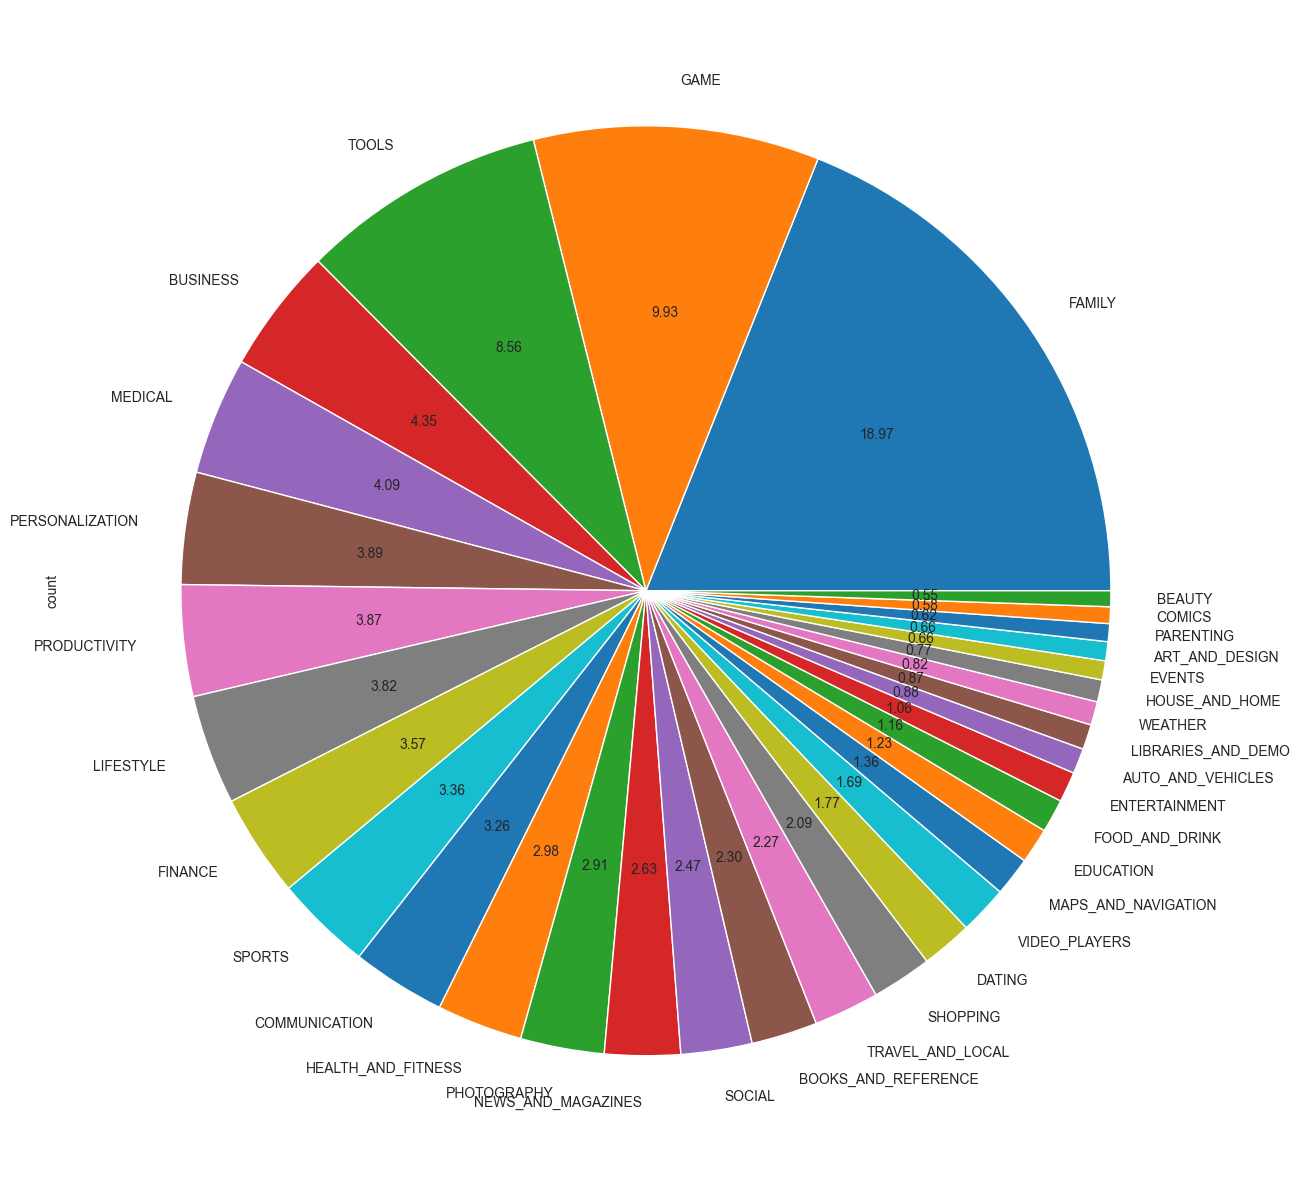

In [62]:
df_gpc['Category'].value_counts().plot.pie(y=df_gpc['Category'], figsize=(15, 20), autopct='%1.2f');

In [63]:
# It shows that the FAMILY app category is the most prevalent category of apps in playstore.


In [64]:
# Use a bar plot to observe the count of values in Content Rating column

In [65]:
len(numerical_cols)

8

In [81]:
print(numerical_cols)

numerical_cols[5]

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'LU_Day', 'LU_Month', 'LU_Year']


'LU_Day'

In [83]:
# df_gpc['LU_Day']

In [90]:
# for i in range(0, len(numerical_cols)):
#     print(df_gpc[numerical_cols[i]])

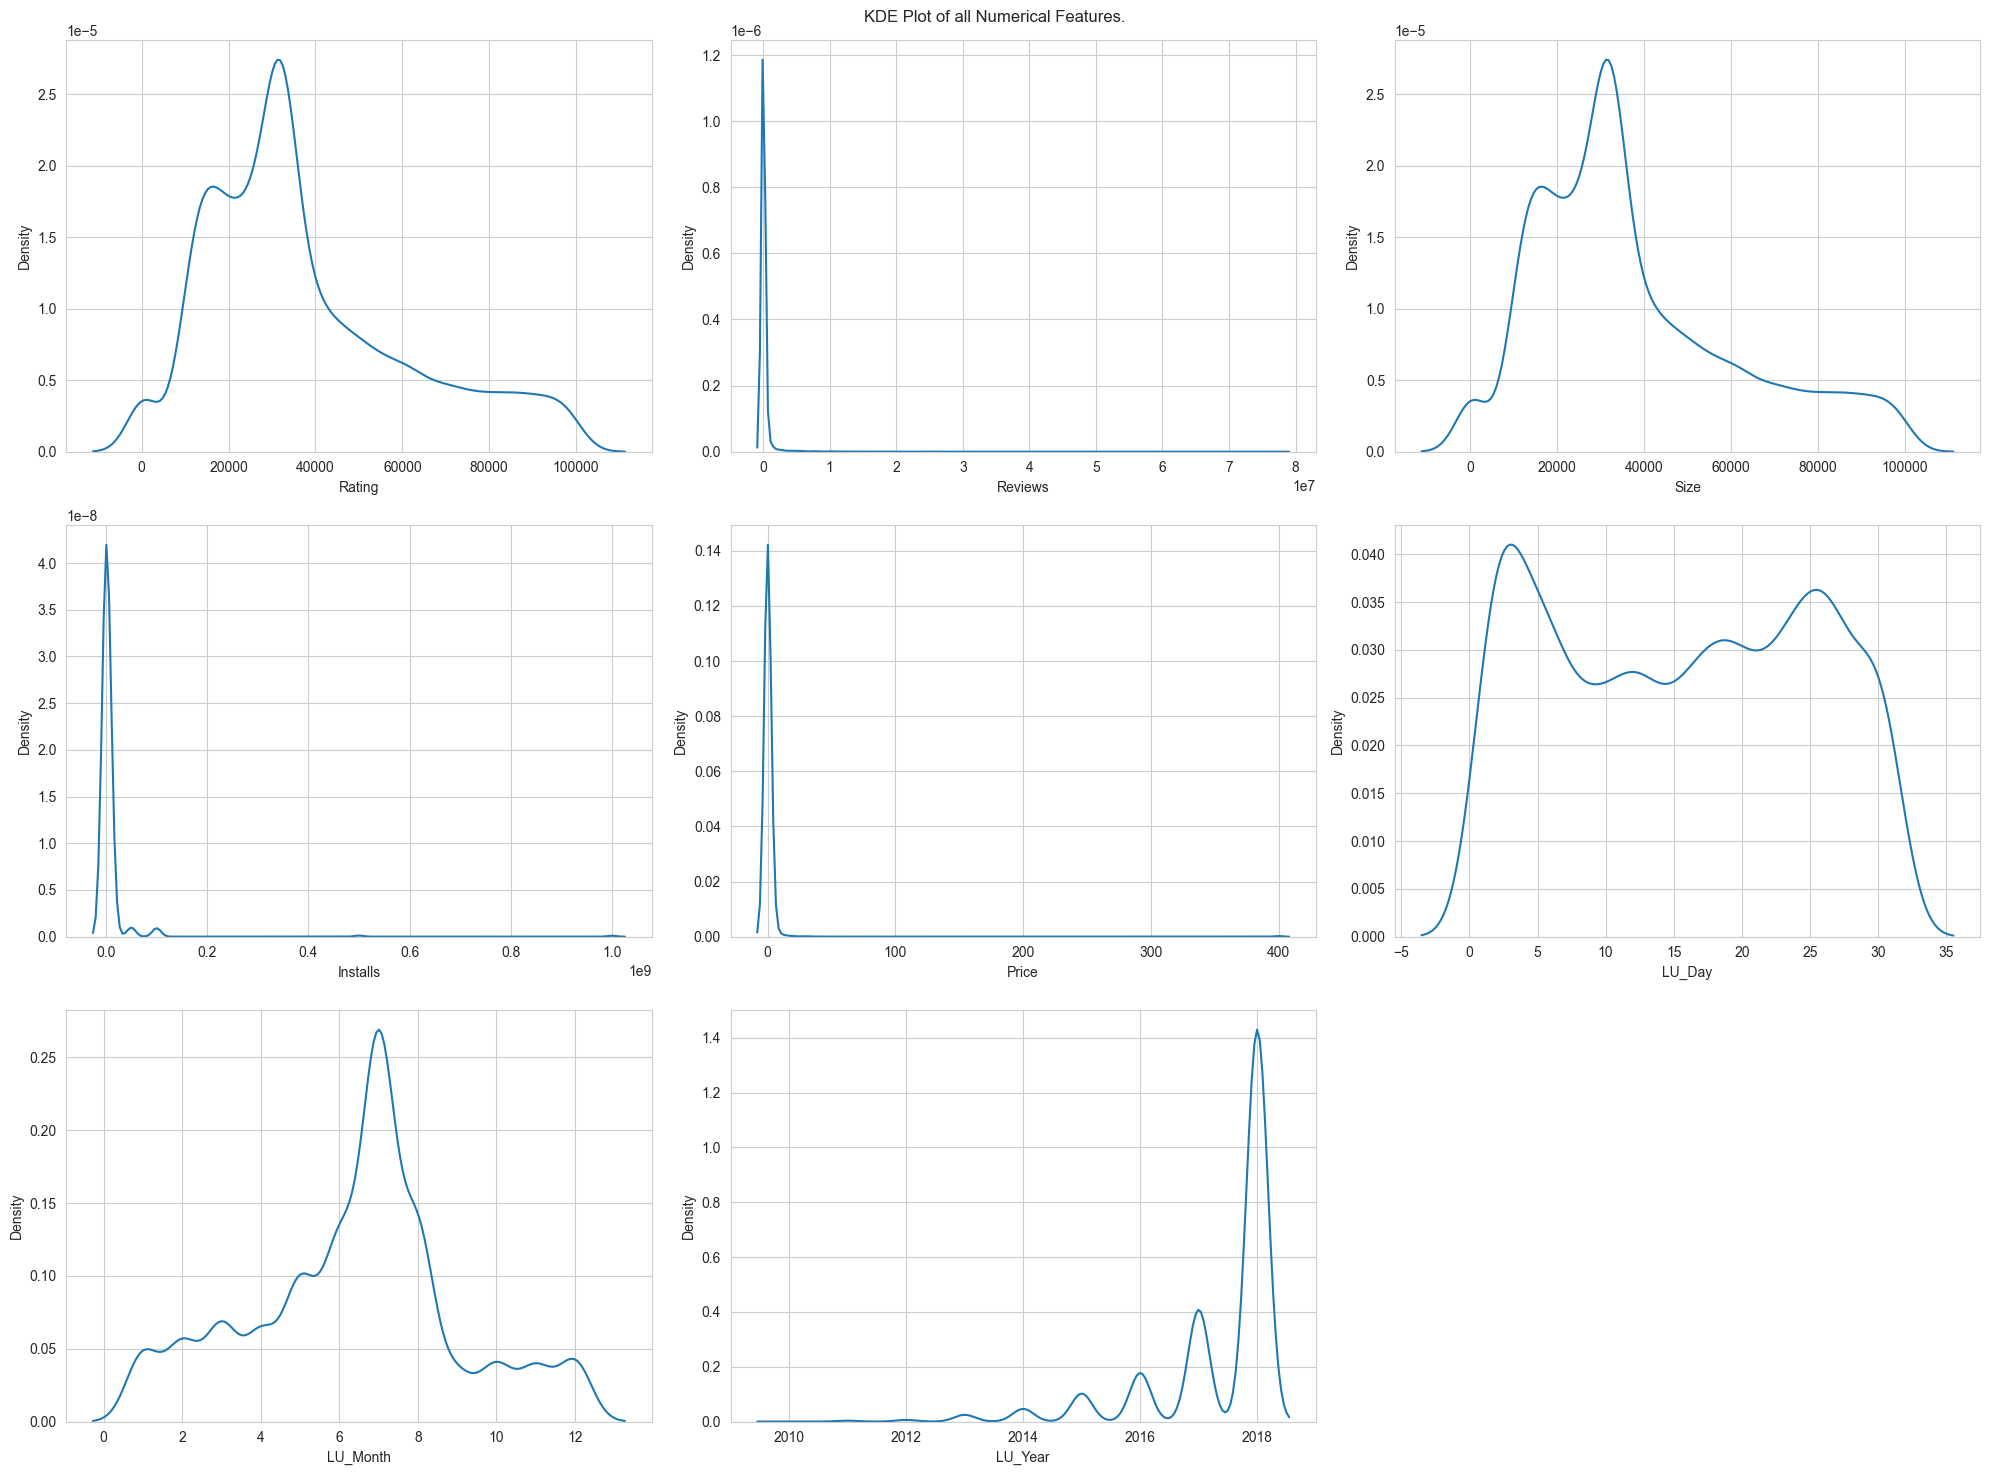

In [77]:
# Creating KDE Plot For Numerical Columns Only

plt.figure(figsize=(20, 15))
plt.suptitle("KDE Plot of all Numerical Features.")

for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x = df_gpc[numerical_cols[i]])
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()